# Teste de Kolmogorov-Smirnov

O Teste de Kolmogorov-Smirnov (KS) é um método estatístico utilizado para determinar se uma amostra segue uma distribuição de probabilidade específica. Ele compara a função de distribuição empírica (EDF) dos dados observados com a função de distribuição acumulada (CDF) da distribuição teórica. Este teste é útil para avaliar a adequação de um modelo teórico aos dados observados.


O teste KS calcula a estatística D de Kolmogorov-Smirnov, que é a maior diferença absoluta entre as funções de distribuição empírica e teórica. Comparamos essa estatística com um valor crítico para determinar se os dados observados seguem a distribuição teórica.

## Resultados Esperados
<br>

<div style="border:2px solid black; padding: 10px; background-color:#CEE0DC">
    <ul>
        <li>Se a estatística D for menor que o valor crítico, podemos aceitar a hipótese nula de que os dados seguem a distribuição teórica.</li>
        <li>Se a estatística D for maior que o valor crítico, há evidências de que os dados observados não seguem a distribuição teórica.</li>
    </ul>  </div>


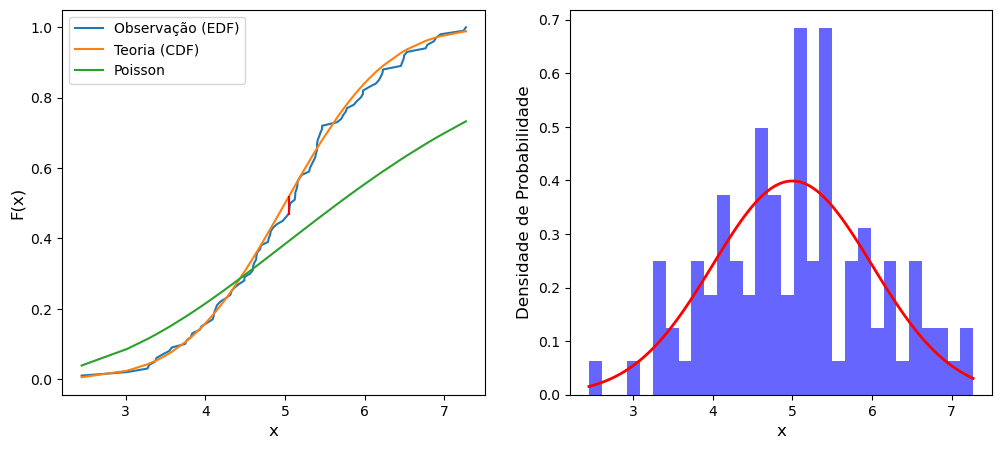

NameError: name 'dn_ks' is not defined

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed

# Definir média e desvio padrão para a distribuição normal
mu = 5
sigma = 1
# Definir uma semente (por exemplo, tornar este exemplo reproduzível)
seed(0)
step = 2

# Passo 1: Gerar dados e plotar gráficos de PDF e histograma
if step == 1:
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Gerar uma amostra de uma distribuição normal
    arr_1_more = np.random.normal(mu, sigma, size=6000)
    arr_1_sorted = np.sort(arr_1_more)
    norm_data = st.norm.pdf(arr_1_sorted, mu, sigma)  # PDF normal
    poisson_pmf = st.poisson.pmf(mu, arr_1_sorted)  # PMF de Poisson
    # Plotar PDF normal e PMF de Poisson
    ax1.plot(arr_1_sorted, norm_data, label="Normal PDF")
    ax1.plot(arr_1_sorted, poisson_pmf, label="Poisson PMF")
    ax1.set_xlabel("x", size=12)
    ax1.set_ylabel("F(x)", size=12)
    ax1.legend()

    # Plotar histograma dos dados
    ax2.hist(arr_1_more, bins=30, density=True, alpha=0.6, color='b')
    x = np.linspace(min(arr_1_sorted), max(arr_1_sorted), 100)
    ax2.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal PDF')
    ax2.set_xlabel("x", size=12)
    ax2.set_ylabel("Densidade de Probabilidade", size=12)
    ax2.legend()

    plt.show()

# Gerar array aleatório
if step > 1:
    mysize = 100
    arr_1_few = np.random.normal(mu, sigma, size=mysize)
    # Ordenar array gerado
    arr_1_sorted = np.sort(arr_1_few)
    # EDF (Função de Distribuição Empírica)
    arr_1_edf_few = np.arange(1, len(arr_1_few) + 1) / len(arr_1_few)
    # Gerar conjunto de dados que segue uma distribuição de Poisson com média=mu
    poisson_cdf = 1 - st.poisson.cdf(mu, arr_1_sorted)
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Plotar EDF e CDF normal
    ax1.plot(arr_1_sorted, arr_1_edf_few, label="Observação (EDF)")
    y_cdf = st.norm.cdf(arr_1_sorted, mu, sigma)  # CDF normal
    norm_data = st.norm.pdf(arr_1_sorted, mu, sigma)  # PDF normal
    ax1.plot(arr_1_sorted, y_cdf, label="Teoria (CDF)")
    ax1.plot(arr_1_sorted, poisson_cdf, label="Poisson")
    ax1.set_xlabel("x", size=12)
    ax1.set_ylabel("F(x)", size=12)

    # Plotar PDF
    ax2.hist(arr_1_few, bins=30, density=True, alpha=0.6, color='b')
    x = np.linspace(min(arr_1_sorted), max(arr_1_sorted), 100)
    ax2.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal PDF')
    ax2.set_xlabel("x", size=12)
    ax2.set_ylabel("Densidade de Probabilidade", size=12)

    # Calcular diferença absoluta
    arr_dif_abs = np.abs(y_cdf - arr_1_edf_few)
    # Obter índice da diferença máxima
    max_diff_index = np.argmax(arr_dif_abs)
    # Obter valor da diferença máxima
    max_diff_value = arr_dif_abs[max_diff_index]
    # Plotar linha para a diferença máxima
    ax1.plot([arr_1_sorted[max_diff_index], arr_1_sorted[max_diff_index]],
             [arr_1_edf_few[max_diff_index], y_cdf[max_diff_index]],
             color='red', linestyle='-')

    legend = ax1.legend(loc="upper left")
    plt.show()

    # Teste de Kolmogorov-Smirnov (KS)
    # Comparar distribuição observada com distribuição normal
    if dn_ks < D_critial:
        print("Os dados observados seguem uma distribuição normal.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição normal.")

    # Comparar distribuição observada com distribuição de Poisson
    if ps_ks < D_critial:
        print("Os dados observados seguem uma distribuição de Poisson.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição de Poisson.")
    print("-" * 85)

    print("Diferença em relação à distribuição normal")
    print(arr_dif_abs)
    print("-" * 85)
    # Calcular diferença absoluta para distribuição de Poisson
    arr_dif_abs_poisson = np.abs(y_cdf - poisson_cdf)
    print("Diferença em relação à distribuição de Poisson")
    print(arr_dif_abs_poisson)
    print("-" * 85)
    # Obter diferença máxima
    dn_ks = max(arr_dif_abs)
    ps_ks = max(arr_dif_abs_poisson)
    print("Diferença máxima em relação à distribuição normal:{}".format(dn_ks))
    print("Diferença máxima em relação à distribuição de Poisson:{}".format(ps_ks))

    # Calcular valor crítico no intervalo de confiança de 95%
    D_critial = 1.36 * np.sqrt(2 / mysize)
    print("Valor crítico no intervalo de confiança de 95%:{}".format(D_critial))

# Teste Kolmogorov-Smirnov com Distribuição Não Normal

## Distribuição Uniforme

A distribuição uniforme é um tipo de distribuição de probabilidade em que todos os valores possíveis de uma variável aleatória têm a mesma probabilidade de ocorrência. Em outras palavras, em uma distribuição uniforme, todos os valores dentro de um intervalo específico são igualmente prováveis de ocorrer.

## Por que o teste não identifica a distribuição uniforme como normal?
- O teste de Kolmogorov-Smirnov (KS) é usado para testar a igualdade de distribuições empíricas ou teóricas. Ele compara uma distribuição de dados observados com uma distribuição de referência, como a distribuição normal. 
- Como a distribuição uniforme não possui a mesma forma característica de uma distribuição normal, o teste KS não a identificará como normal. A distribuição uniforme tem uma densidade de probabilidade constante dentro de um intervalo, enquanto a distribuição normal tem uma forma de sino com valores mais concentrados em torno da média.
- Portanto, o teste KS é capaz de detectar as diferenças na forma da distribuição e, assim, distinguir entre uma distribuição uniforme e uma distribuição normal.

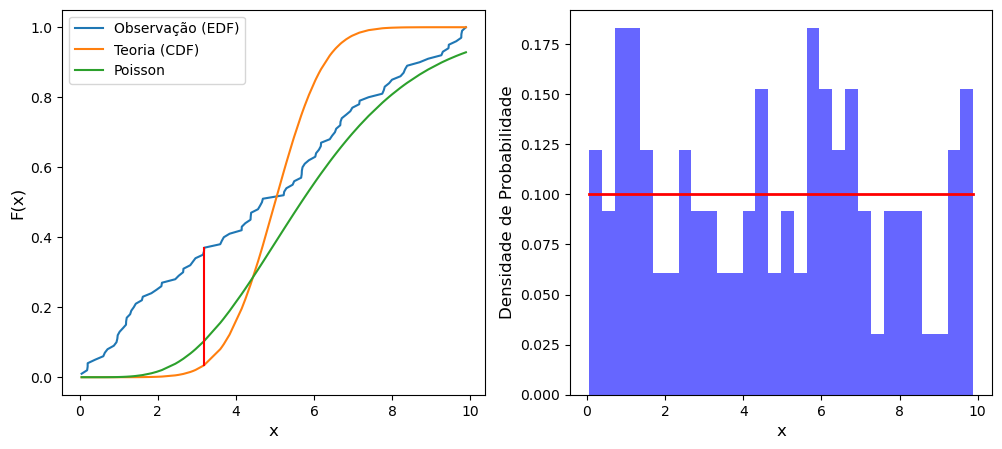

NameError: name 'dn_ks' is not defined

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed

# Definindo média e desvio padrão para a distribuição normal
mu = 5
sigma = 1
# Definindo uma semente (por exemplo, tornar este exemplo reproduzível)
seed(0)
step = 2

# Passo 1: Gerar dados e plotar gráficos de PDF e histograma
if step == 1:
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Gerar uma amostra de uma distribuição normal
    arr_1_more = np.random.normal(mu, sigma, size=6000)
    arr_1_sorted = np.sort(arr_1_more)
    norm_data = st.norm.pdf(arr_1_sorted, mu, sigma)  # PDF normal
    poisson_pmf = st.poisson.pmf(mu, arr_1_sorted)  # PMF de Poisson
    # Plotar PDF normal e PMF de Poisson
    ax1.plot(arr_1_sorted, norm_data, label="Normal PDF")
    ax1.plot(arr_1_sorted, poisson_pmf, label="Poisson PMF")
    ax1.set_xlabel("x", size=12)
    ax1.set_ylabel("F(x)", size=12)
    ax1.legend()

    # Plotar histograma dos dados
    ax2.hist(arr_1_more, bins=30, density=True, alpha=0.6, color='b')
    x = np.linspace(min(arr_1_sorted), max(arr_1_sorted), 100)
    ax2.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal PDF')
    ax2.set_xlabel("x", size=12)
    ax2.set_ylabel("Densidade de Probabilidade", size=12)
    ax2.legend()

    plt.show()

# Gerar array aleatório
if step > 1:
    mysize = 100
    arr_1_few = np.random.uniform(0, 10, size=mysize)  # Gerar array de uma distribuição uniforme
    # Ordenar array gerado
    arr_1_sorted = np.sort(arr_1_few)
    # EDF (Função de Distribuição Empírica)
    arr_1_edf_few = np.arange(1, len(arr_1_few) + 1) / len(arr_1_few)
    # Gerar conjunto de dados que segue uma distribuição de Poisson com média=mu
    poisson_cdf = 1 - st.poisson.cdf(mu, arr_1_sorted)
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Plotar EDF e CDF normal
    ax1.plot(arr_1_sorted, arr_1_edf_few, label="Observação (EDF)")
    y_cdf = st.norm.cdf(arr_1_sorted, mu, sigma)  # CDF normal
    norm_data = st.norm.pdf(arr_1_sorted, mu, sigma)  # PDF normal
    ax1.plot(arr_1_sorted, y_cdf, label="Teoria (CDF)")
    ax1.plot(arr_1_sorted, poisson_cdf, label="Poisson")
    ax1.set_xlabel("x", size=12)
    ax1.set_ylabel("F(x)", size=12)

    # Plotar PDF
    ax2.hist(arr_1_few, bins=30, density=True, alpha=0.6, color='b')
    x = np.linspace(min(arr_1_sorted), max(arr_1_sorted), 100)
    ax2.plot(x, st.uniform.pdf(x, loc=0, scale=10), 'r-', lw=2, label='Uniform PDF')
    ax2.set_xlabel("x", size=12)
    ax2.set_ylabel("Densidade de Probabilidade", size=12)

    # Calcular diferença absoluta
    arr_dif_abs = np.abs(y_cdf - arr_1_edf_few)
    # Obter índice da diferença máxima
    max_diff_index = np.argmax(arr_dif_abs)
    # Obter valor da diferença máxima
    max_diff_value = arr_dif_abs[max_diff_index]
    # Plotar linha para a diferença máxima
    ax1.plot([arr_1_sorted[max_diff_index], arr_1_sorted[max_diff_index]],
             [arr_1_edf_few[max_diff_index], y_cdf[max_diff_index]],
             color='red', linestyle='-')

    legend = ax1.legend(loc="upper left")
    plt.show()

    # Comparar distribuição observada com distribuição normal
    if dn_ks < D_critial:
        print("Os dados observados seguem uma distribuição normal.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição normal.")

    # Comparar distribuição observada com distribuição de Poisson
    if ps_ks < D_critial:
        print("Os dados observados seguem uma distribuição de Poisson.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição de Poisson.")
    print("-" * 85)

    print("Diferença em relação à distribuição uniforme")
    print(arr_dif_abs)
    print("-" * 85)
    # Calcular diferença absoluta para distribuição de Poisson
    arr_dif_abs_poisson = np.abs(y_cdf - poisson_cdf)
    print("Diferença em relação à distribuição de Poisson")
    print(arr_dif_abs_poisson)
    print("-" * 85)
    # Obter diferença máxima
    dn_ks = max(arr_dif_abs)
    ps_ks = max(arr_dif_abs_poisson)
    print("Diferença máxima em relação à distribuição uniforme:{}".format(dn_ks))
    print("Diferença máxima em relação à distribuição de Poisson:{}".format(ps_ks))

    # Calcular valor crítico no intervalo de confiança de 95%
    D_critial = 1.36 * np.sqrt(2 / mysize)
    print("Valor crítico no intervalo de confiança de 95%:{}".format(D_critial))
